In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from Class_func import Cube

In [2]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/MMAMOTH1/MAMMOHT-1_individual/'

sky_cube1=Cube.read(dic+'1441+4003_00136_icubes_cut.fits')
sky_cube2=Cube.read(dic+'1441+4003_00145_icubes_cut.fits')

sky_cube1=sky_cube1.subcube(zlo=3850*u.AA,zhi=4200*u.AA)
sky_cube2=sky_cube2.subcube(zlo=5150*u.AA,zhi=5400*u.AA)

sky_datacube1=sky_cube1._data.copy()
sky_datacube2=sky_cube2._data.copy()

lamda1_axis=sky_cube1.spectral_axis.to(u.AA).value
lamda2_axis=sky_cube2.spectral_axis.to(u.AA).value

spec1=sky_datacube1.mean(axis=1).mean(axis=1)
spec2=sky_datacube2.mean(axis=1).mean(axis=1)

In [3]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/MMAMOTH1/sky emission line/J_A+A_407_1157/'
skyline1=pd.read_csv(dic+'table5.dat',sep='\s+',engine='python',header=None)
skyline2=pd.read_csv(dic+'table6.dat',sep='\s+',engine='python',header=None)
sky_wave1=skyline1[1][(skyline1[1]>=3850.)&(skyline1[1]<=4200.)]
sky_spec1=skyline1[3][(skyline1[1]>=3850.)&(skyline1[1]<=4200.)]
sky_wave2=skyline2[1][(skyline2[1]>=5150.)&(skyline2[1]<=5400.)]
sky_spec2=skyline2[3][(skyline2[1]>=5150.)&(skyline2[1]<=5400.)]

In [4]:
orig_wave1=np.array([3907.8947368421054,3943.1578947368425,
                     3984.2105263157896,4135.263157894737])
real_wave1=np.array([3903.1578947368425,3937.8947368421054,
                     3979.4736842105267,4130.526315789474])
residual1=orig_wave1-real_wave1

orig_wave2=np.array([5197.727272727272,5223.863636363636,
                     5238.636363636363,5256.060606060606,
                     5275.757575757575,5298.484848484848,
                     5313.257575757575,5330.681818181818,])
real_wave2=np.array([5241.287878787878,5266.666666666666,
                     5281.439393939394,5298.863636363636,
                     5318.181818181818,5340.909090909091,
                     5354.545454545454,5372.727272727272])
residual2=orig_wave2-real_wave2
print(residual1.mean())
# print(residual1.std())
print(residual2.mean())
# print(residual2.std())

4.868421052631334
-42.51893939393949


In [5]:
print(4.868421052631334/1215.67)
print(42.51893939393949/1640)
print(42.51893939393949/1549)

0.004004722541998514
0.025926182557280176
0.027449283017391538


In [6]:
print(2.3116-0.0040)
print(2.3116+0.0259)
print(2.3116+0.0274)

2.3076
2.3375
2.339


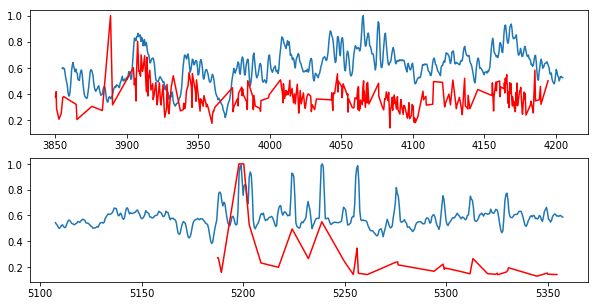

In [9]:
fig,ax=plt.subplots(2,1)
ax[0].plot(lamda1_axis+4.868421052631334,spec1/spec1.max())
ax[0].plot(sky_wave1,sky_spec1/sky_spec1.max(),color='red')
ax[1].plot(lamda2_axis-42.51893939393949,spec2/spec2[~np.isnan(spec2)].max())
ax[1].plot(sky_wave2,sky_spec2/sky_spec2.max(),color='red')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()
savdic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/models/img/'
# plt.savefig(savdic+'sky_line.png',dpi=50)